### K-Means without Oversampling

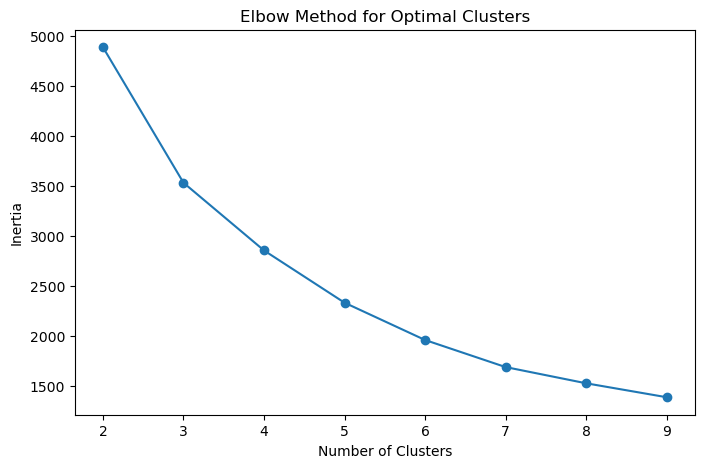

Training Data Metrics:
Silhouette Score: 0.34
Calinski-Harabasz Index: 1534.66
Davies-Bouldin Index: 0.95

Test Data Metrics:
Silhouette Score: 0.33
Calinski-Harabasz Index: 407.66
Davies-Bouldin Index: 0.93


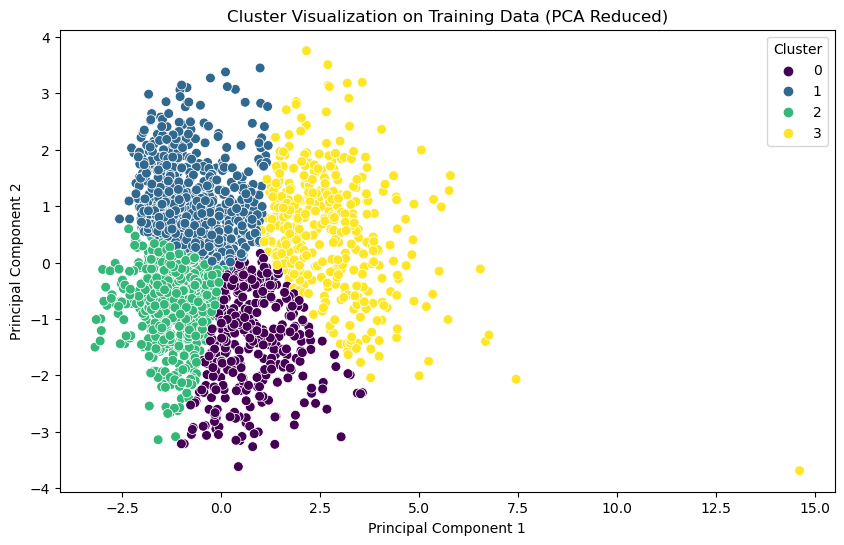

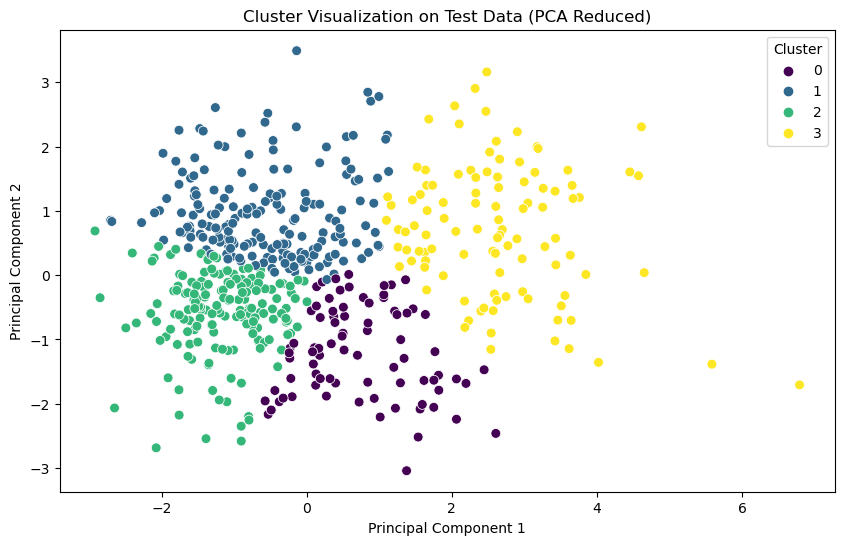

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Load the dataset
data = pd.read_csv('cleaned_train.csv')

# Step 1: Filter out "Adult" category
data = data[data['age_group'] != 'Adult']

# Step 2: Ordinal encode the 'age_group' column
ordinal_encoder = OrdinalEncoder(categories=[['Child', 'Early Teen', 'Teen', 'Young Adult']])
data['age_group'] = ordinal_encoder.fit_transform(data[['age_group']])

# Drop unnecessary columns
columns_to_drop = ['id', 'sii']  # Remove unnecessary columns
data_numeric = data.drop(columns=columns_to_drop, axis=1)

# Step 3: Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Train-Test Split (80-20)
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

# Step 4: PCA for Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce to 2 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)  # Apply the same transformation to test data

# Step 5: Determine Optimal Clusters using the Elbow Method
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# optimal number of clusters based on elbow curve
optimal_k = 4 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Step 6: Fit K-Means on Training Data
kmeans.fit(X_train_pca)
train_clusters = kmeans.labels_
test_clusters = kmeans.predict(X_test_pca)

# Step 7: Evaluate Clustering Performance
# Metrics for Training Data
train_silhouette = silhouette_score(X_train_pca, train_clusters)
train_calinski_harabasz = calinski_harabasz_score(X_train_pca, train_clusters)
train_davies_bouldin = davies_bouldin_score(X_train_pca, train_clusters)

print(f"Training Data Metrics:")
print(f"Silhouette Score: {train_silhouette:.2f}")
print(f"Calinski-Harabasz Index: {train_calinski_harabasz:.2f}")
print(f"Davies-Bouldin Index: {train_davies_bouldin:.2f}")

# Metrics for Test Data
test_silhouette = silhouette_score(X_test_pca, test_clusters)
test_calinski_harabasz = calinski_harabasz_score(X_test_pca, test_clusters)
test_davies_bouldin = davies_bouldin_score(X_test_pca, test_clusters)

print(f"\nTest Data Metrics:")
print(f"Silhouette Score: {test_silhouette:.2f}")
print(f"Calinski-Harabasz Index: {test_calinski_harabasz:.2f}")
print(f"Davies-Bouldin Index: {test_davies_bouldin:.2f}")

# Step 8: Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=train_clusters, palette='viridis', s=50)
plt.title('Cluster Visualization on Training Data (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=test_clusters, palette='viridis', s=50)
plt.title('Cluster Visualization on Test Data (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

### K-Means with ADASYN

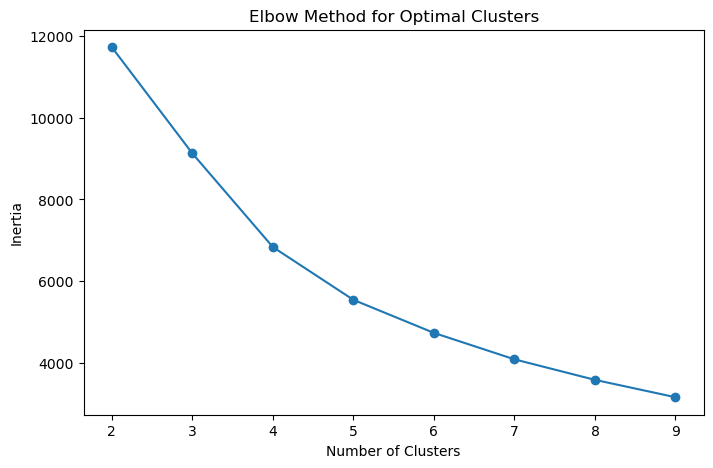

Training Data Metrics:
Silhouette Score: 0.36
Calinski-Harabasz Index: 3998.84
Davies-Bouldin Index: 0.94

Test Data Metrics:
Silhouette Score: 0.36
Calinski-Harabasz Index: 1018.57
Davies-Bouldin Index: 0.96


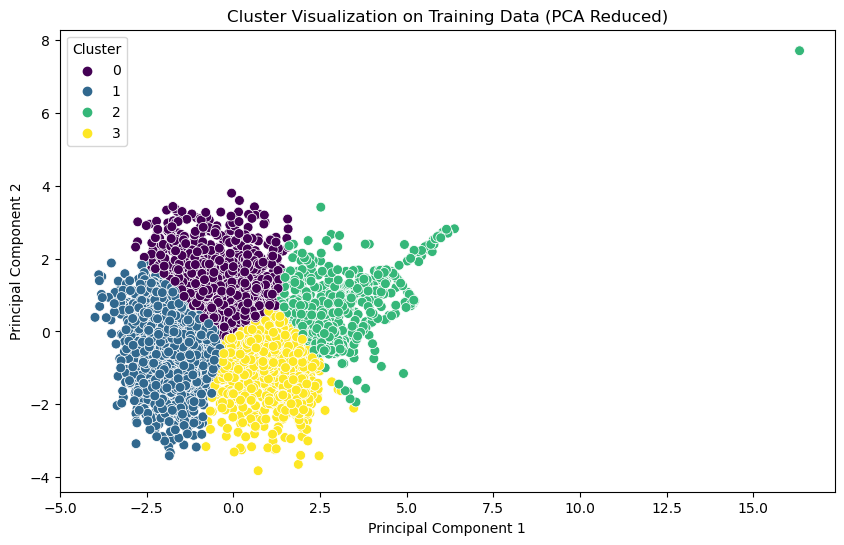

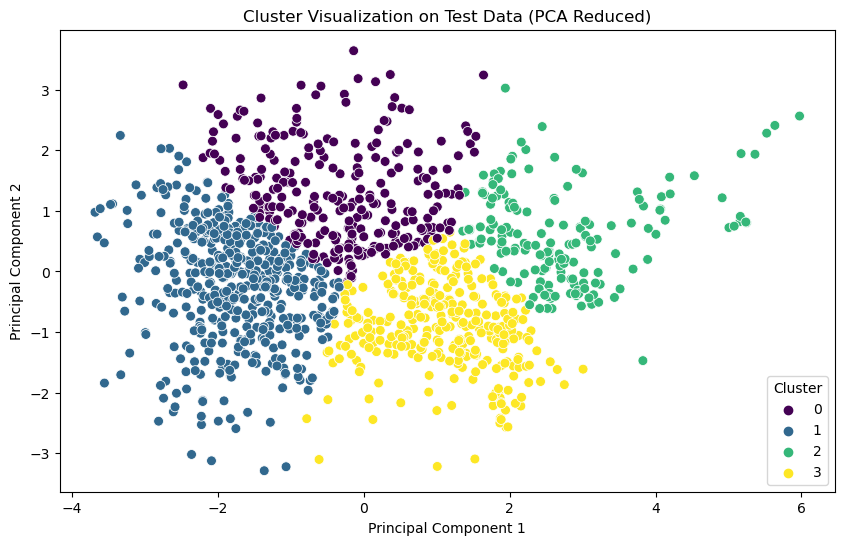

In [12]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Load the dataset
data = pd.read_csv('cleaned_train.csv')

# Step 1: Filter out "Adult" category
data = data[data['age_group'] != 'Adult']

# Step 2: Ordinal encode the 'age_group' column
ordinal_encoder = OrdinalEncoder(categories=[['Child', 'Early Teen', 'Teen', 'Young Adult']])
data['age_group'] = ordinal_encoder.fit_transform(data[['age_group']])

# Drop unnecessary columns
columns_to_drop = ['id', 'sii']  # Remove unnecessary columns
data_numeric = data.drop(columns=columns_to_drop, axis=1)

# Split into features and target
X = data_numeric
y = data['sii']  # Use 'sii' for oversampling

# Step 3: Apply ADASYN for Oversampling
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Step 4: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Step 5: PCA for Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce to 2 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)  # Apply the same transformation to test data

# Step 6: Determine Optimal Clusters using the Elbow Method
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Optimal number of clusters based on elbow curve
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Step 7: Fit K-Means on Training Data
kmeans.fit(X_train_pca)
train_clusters = kmeans.labels_
test_clusters = kmeans.predict(X_test_pca)

# Step 8: Evaluate Clustering Performance
# Metrics for Training Data
train_silhouette = silhouette_score(X_train_pca, train_clusters)
train_calinski_harabasz = calinski_harabasz_score(X_train_pca, train_clusters)
train_davies_bouldin = davies_bouldin_score(X_train_pca, train_clusters)

print(f"Training Data Metrics:")
print(f"Silhouette Score: {train_silhouette:.2f}")
print(f"Calinski-Harabasz Index: {train_calinski_harabasz:.2f}")
print(f"Davies-Bouldin Index: {train_davies_bouldin:.2f}")

# Metrics for Test Data
test_silhouette = silhouette_score(X_test_pca, test_clusters)
test_calinski_harabasz = calinski_harabasz_score(X_test_pca, test_clusters)
test_davies_bouldin = davies_bouldin_score(X_test_pca, test_clusters)

print(f"\nTest Data Metrics:")
print(f"Silhouette Score: {test_silhouette:.2f}")
print(f"Calinski-Harabasz Index: {test_calinski_harabasz:.2f}")
print(f"Davies-Bouldin Index: {test_davies_bouldin:.2f}")

# Step 9: Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=train_clusters, palette='viridis', s=50)
plt.title('Cluster Visualization on Training Data (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=test_clusters, palette='viridis', s=50)
plt.title('Cluster Visualization on Test Data (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


### K-Means with Oversampling and t-SNE

C:\Users\samhi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\samhi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


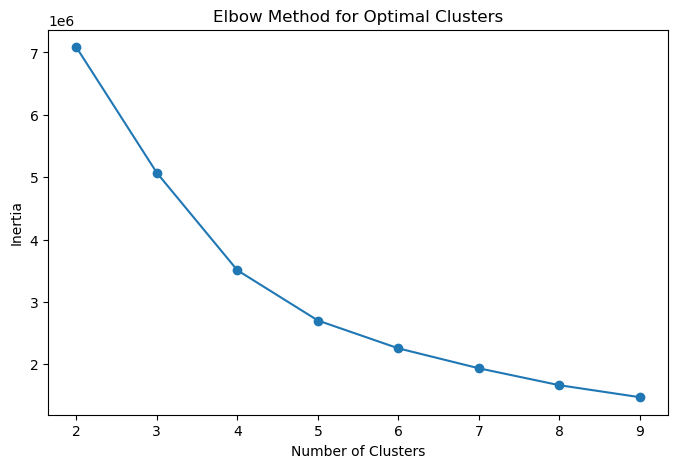

Training Data Metrics:
Silhouette Score: 0.43
Calinski-Harabasz Index: 6697.22
Davies-Bouldin Index: 0.78

Test Data Metrics:
Silhouette Score: 0.38
Calinski-Harabasz Index: 1569.39
Davies-Bouldin Index: 0.95


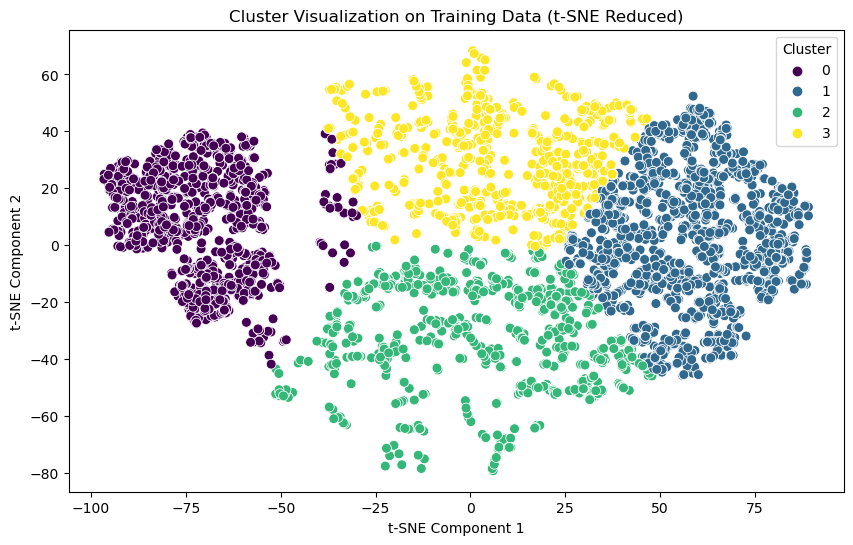

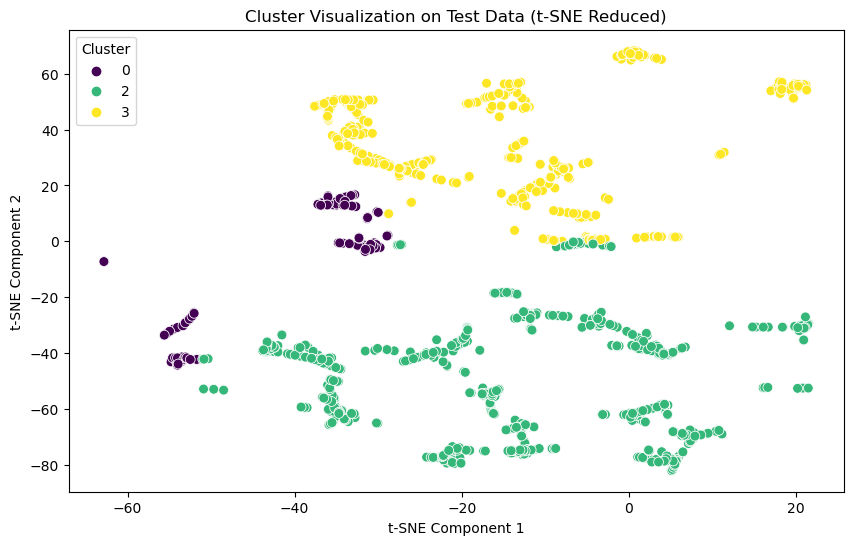

In [17]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.manifold import TSNE

# Load the dataset
data = pd.read_csv('cleaned_train.csv')

# Step 1: Filter out "Adult" category
data = data[data['age_group'] != 'Adult']

# Step 2: Ordinal encode the 'age_group' column
ordinal_encoder = OrdinalEncoder(categories=[['Child', 'Early Teen', 'Teen', 'Young Adult']])
data['age_group'] = ordinal_encoder.fit_transform(data[['age_group']])

# Drop unnecessary columns
columns_to_drop = ['id', 'sii']  # Remove unnecessary columns
data_numeric = data.drop(columns=columns_to_drop, axis=1)

# Split into features and target
X = data_numeric
y = data['sii']  # Use 'sii' for oversampling

# Step 3: Apply ADASYN for Oversampling
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Step 4: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Step 5: t-SNE for Dimensionality Reduction
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 components
X_tsne = tsne.fit_transform(X_scaled)  # Fit and transform both train and test data together

# Split back into train and test data
X_train_tsne = X_tsne[:len(X_train)]
X_test_tsne = X_tsne[len(X_train):]

# Step 6: Determine Optimal Clusters using the Elbow Method
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_tsne)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Optimal number of clusters based on elbow curve
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Step 7: Fit K-Means on Training Data
kmeans.fit(X_train_tsne)
train_clusters = kmeans.labels_
test_clusters = kmeans.predict(X_test_tsne)

# Step 8: Evaluate Clustering Performance
# Metrics for Training Data
train_silhouette = silhouette_score(X_train_tsne, train_clusters)
train_calinski_harabasz = calinski_harabasz_score(X_train_tsne, train_clusters)
train_davies_bouldin = davies_bouldin_score(X_train_tsne, train_clusters)

print(f"Training Data Metrics:")
print(f"Silhouette Score: {train_silhouette:.2f}")
print(f"Calinski-Harabasz Index: {train_calinski_harabasz:.2f}")
print(f"Davies-Bouldin Index: {train_davies_bouldin:.2f}")

# Metrics for Test Data
test_silhouette = silhouette_score(X_test_tsne, test_clusters)
test_calinski_harabasz = calinski_harabasz_score(X_test_tsne, test_clusters)
test_davies_bouldin = davies_bouldin_score(X_test_tsne, test_clusters)

print(f"\nTest Data Metrics:")
print(f"Silhouette Score: {test_silhouette:.2f}")
print(f"Calinski-Harabasz Index: {test_calinski_harabasz:.2f}")
print(f"Davies-Bouldin Index: {test_davies_bouldin:.2f}")

# Step 9: Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=train_clusters, palette='viridis', s=50)
plt.title('Cluster Visualization on Training Data (t-SNE Reduced)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_tsne[:, 0], y=X_test_tsne[:, 1], hue=test_clusters, palette='viridis', s=50)
plt.title('Cluster Visualization on Test Data (t-SNE Reduced)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()


In [18]:
pip install umap-learn


     ---------------------------------------- 88.8/88.8 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 56.9/56.9 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


C:\Users\samhi\anaconda3\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


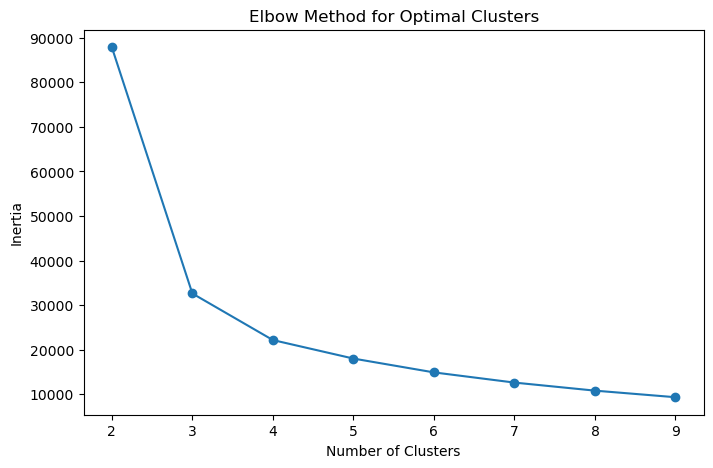

Training Data Metrics:
Silhouette Score: 0.60
Calinski-Harabasz Index: 18447.66
Davies-Bouldin Index: 0.63

Test Data Metrics:
Silhouette Score: 0.61
Calinski-Harabasz Index: 4925.77
Davies-Bouldin Index: 0.62


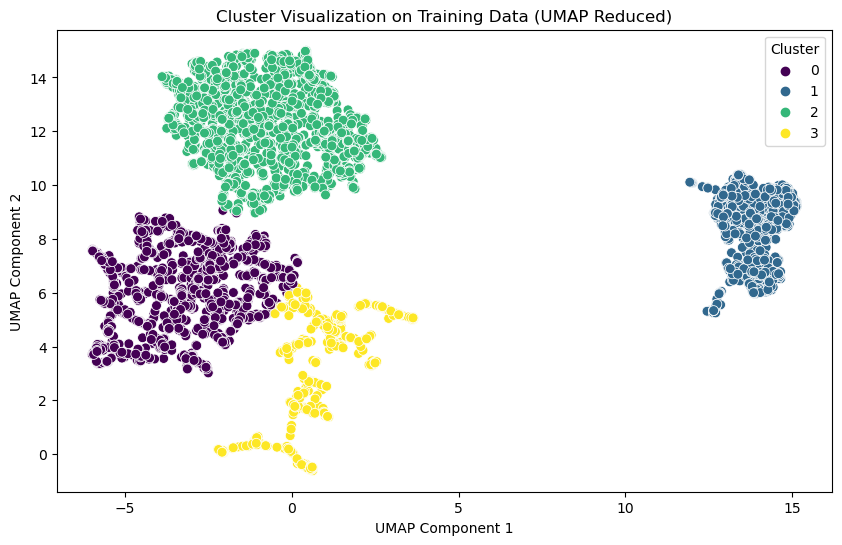

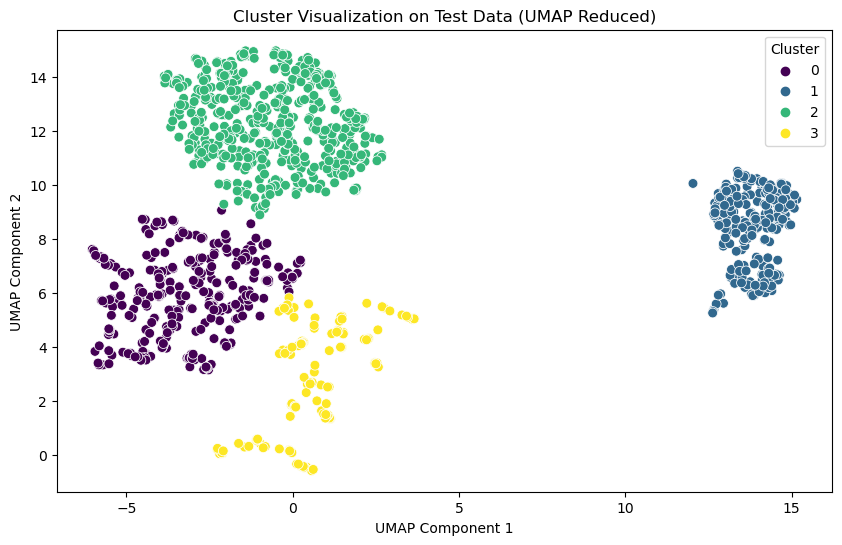

In [19]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import umap

# Load the dataset
data = pd.read_csv('cleaned_train.csv')

# Step 1: Filter out "Adult" category
data = data[data['age_group'] != 'Adult']

# Step 2: Ordinal encode the 'age_group' column
ordinal_encoder = OrdinalEncoder(categories=[['Child', 'Early Teen', 'Teen', 'Young Adult']])
data['age_group'] = ordinal_encoder.fit_transform(data[['age_group']])

# Drop unnecessary columns
columns_to_drop = ['id', 'sii']  # Remove unnecessary columns
data_numeric = data.drop(columns=columns_to_drop, axis=1)

# Split into features and target
X = data_numeric
y = data['sii']  # Use 'sii' for oversampling

# Step 3: Apply ADASYN for Oversampling
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Step 4: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Step 5: UMAP for Dimensionality Reduction
umap_model = umap.UMAP(n_components=2, random_state=42)  # Reduce to 2 components
X_train_umap = umap_model.fit_transform(X_train)
X_test_umap = umap_model.transform(X_test)  # Apply the same transformation to test data

# Step 6: Determine Optimal Clusters using the Elbow Method
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_umap)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Optimal number of clusters based on elbow curve
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Step 7: Fit K-Means on Training Data
kmeans.fit(X_train_umap)
train_clusters = kmeans.labels_
test_clusters = kmeans.predict(X_test_umap)

# Step 8: Evaluate Clustering Performance
# Metrics for Training Data
train_silhouette = silhouette_score(X_train_umap, train_clusters)
train_calinski_harabasz = calinski_harabasz_score(X_train_umap, train_clusters)
train_davies_bouldin = davies_bouldin_score(X_train_umap, train_clusters)

print(f"Training Data Metrics:")
print(f"Silhouette Score: {train_silhouette:.2f}")
print(f"Calinski-Harabasz Index: {train_calinski_harabasz:.2f}")
print(f"Davies-Bouldin Index: {train_davies_bouldin:.2f}")

# Metrics for Test Data
test_silhouette = silhouette_score(X_test_umap, test_clusters)
test_calinski_harabasz = calinski_harabasz_score(X_test_umap, test_clusters)
test_davies_bouldin = davies_bouldin_score(X_test_umap, test_clusters)

print(f"\nTest Data Metrics:")
print(f"Silhouette Score: {test_silhouette:.2f}")
print(f"Calinski-Harabasz Index: {test_calinski_harabasz:.2f}")
print(f"Davies-Bouldin Index: {test_davies_bouldin:.2f}")

# Step 9: Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_umap[:, 0], y=X_train_umap[:, 1], hue=train_clusters, palette='viridis', s=50)
plt.title('Cluster Visualization on Training Data (UMAP Reduced)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_umap[:, 0], y=X_test_umap[:, 1], hue=test_clusters, palette='viridis', s=50)
plt.title('Cluster Visualization on Test Data (UMAP Reduced)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Cluster')
plt.show()


### K-Means with U-MAP with ARI Measure

C:\Users\samhi\anaconda3\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


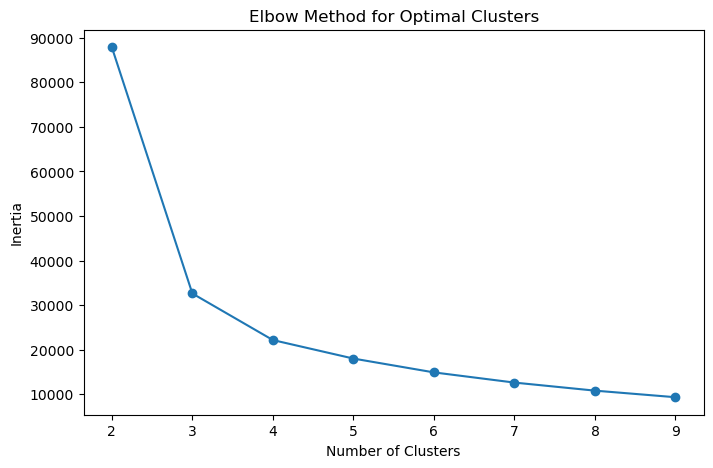

Training Data Metrics:
Silhouette Score: 0.60
Calinski-Harabasz Index: 18447.66
Davies-Bouldin Index: 0.63
Rand Index: 0.66
Adjusted Rand Index: 0.16
Mutual Information: 0.30
V-Measure: 0.22

Test Data Metrics:
Silhouette Score: 0.61
Calinski-Harabasz Index: 4925.77
Davies-Bouldin Index: 0.62
Rand Index: 0.67
Adjusted Rand Index: 0.17
Mutual Information: 0.32
V-Measure: 0.24


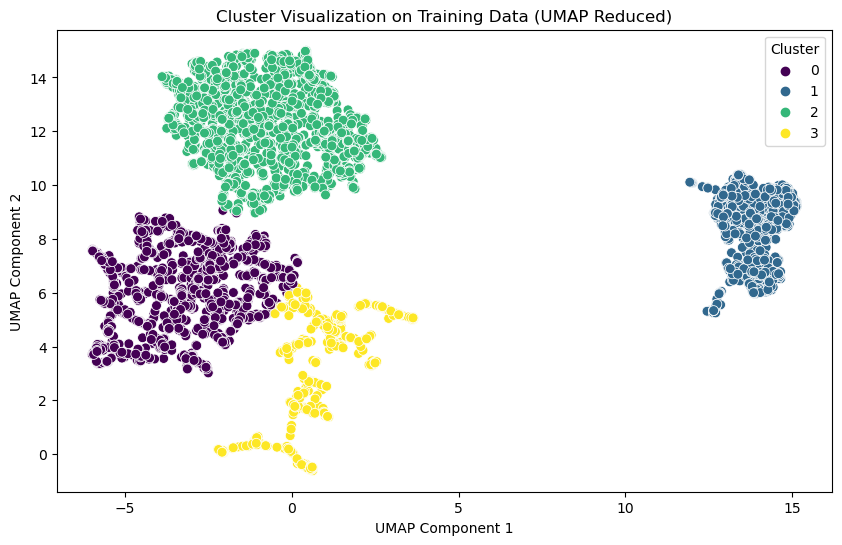

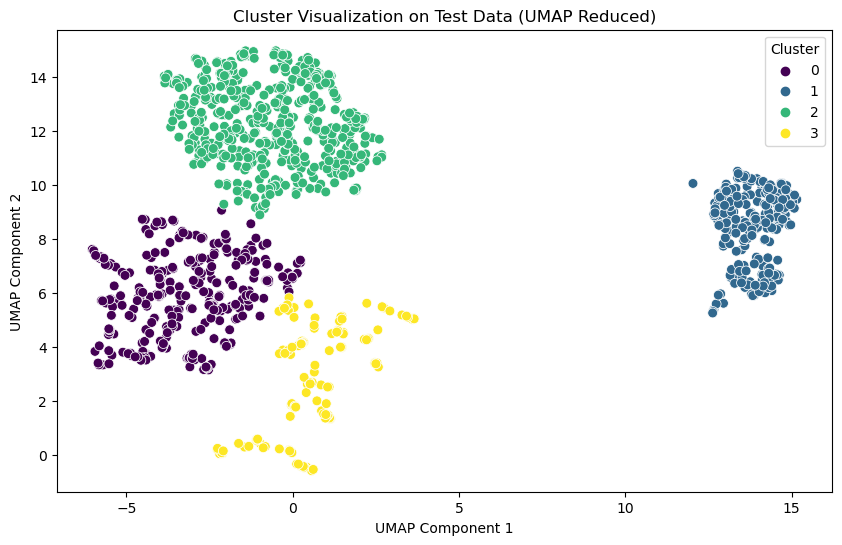

In [34]:
from sklearn.metrics import rand_score, adjusted_rand_score, mutual_info_score, v_measure_score
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import umap

# Load the dataset
data = pd.read_csv('cleaned_train.csv')

# Step 1: Filter out "Adult" category
data = data[data['age_group'] != 'Adult']

# Step 2: Ordinal encode the 'age_group' column
ordinal_encoder = OrdinalEncoder(categories=[['Child', 'Early Teen', 'Teen', 'Young Adult']])
data['age_group'] = ordinal_encoder.fit_transform(data[['age_group']])

# Drop unnecessary columns
columns_to_drop = ['id', 'sii']  # Remove unnecessary columns
data_numeric = data.drop(columns=columns_to_drop, axis=1)

# Split into features and target
X = data_numeric
y = data['sii']  # Use 'sii' for oversampling

# Step 3: Apply ADASYN for Oversampling
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Step 4: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Step 5: UMAP for Dimensionality Reduction
umap_model = umap.UMAP(n_components=2, random_state=42)  # Reduce to 2 components
X_train_umap = umap_model.fit_transform(X_train)
X_test_umap = umap_model.transform(X_test)  # Apply the same transformation to test data

# Step 6: Determine Optimal Clusters using the Elbow Method
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_umap)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Optimal number of clusters based on elbow curve
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Step 7: Fit K-Means on Training Data
kmeans.fit(X_train_umap)
train_clusters = kmeans.labels_
test_clusters = kmeans.predict(X_test_umap)

# Step 8: Evaluate Clustering Performance
# Metrics for Training Data
train_silhouette = silhouette_score(X_train_umap, train_clusters)
train_calinski_harabasz = calinski_harabasz_score(X_train_umap, train_clusters)
train_davies_bouldin = davies_bouldin_score(X_train_umap, train_clusters)

# Rand Index and Adjusted Rand Index for Training Data
train_rand_index = rand_score(y_train, train_clusters)
train_adjusted_rand_index = adjusted_rand_score(y_train, train_clusters)

# Mutual Information and V-Measure for Training Data
train_mutual_info = mutual_info_score(y_train, train_clusters)
train_v_measure = v_measure_score(y_train, train_clusters)

# Metrics for Test Data
test_silhouette = silhouette_score(X_test_umap, test_clusters)
test_calinski_harabasz = calinski_harabasz_score(X_test_umap, test_clusters)
test_davies_bouldin = davies_bouldin_score(X_test_umap, test_clusters)

# Rand Index and Adjusted Rand Index for Test Data
test_rand_index = rand_score(y_test, test_clusters)
test_adjusted_rand_index = adjusted_rand_score(y_test, test_clusters)

# Mutual Information and V-Measure for Test Data
test_mutual_info = mutual_info_score(y_test, test_clusters)
test_v_measure = v_measure_score(y_test, test_clusters)

# Print Training Data Metrics
print(f"Training Data Metrics:")
print(f"Silhouette Score: {train_silhouette:.2f}")
print(f"Calinski-Harabasz Index: {train_calinski_harabasz:.2f}")
print(f"Davies-Bouldin Index: {train_davies_bouldin:.2f}")
print(f"Rand Index: {train_rand_index:.2f}")
print(f"Adjusted Rand Index: {train_adjusted_rand_index:.2f}")
print(f"Mutual Information: {train_mutual_info:.2f}")
print(f"V-Measure: {train_v_measure:.2f}")

# Print Test Data Metrics
print(f"\nTest Data Metrics:")
print(f"Silhouette Score: {test_silhouette:.2f}")
print(f"Calinski-Harabasz Index: {test_calinski_harabasz:.2f}")
print(f"Davies-Bouldin Index: {test_davies_bouldin:.2f}")
print(f"Rand Index: {test_rand_index:.2f}")
print(f"Adjusted Rand Index: {test_adjusted_rand_index:.2f}")
print(f"Mutual Information: {test_mutual_info:.2f}")
print(f"V-Measure: {test_v_measure:.2f}")

# Step 9: Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_umap[:, 0], y=X_train_umap[:, 1], hue=train_clusters, palette='viridis', s=50)
plt.title('Cluster Visualization on Training Data (UMAP Reduced)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_umap[:, 0], y=X_test_umap[:, 1], hue=test_clusters, palette='viridis', s=50)
plt.title('Cluster Visualization on Test Data (UMAP Reduced)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Cluster')
plt.show()

### Kernel K-Means Implementation

In [27]:
pip install pyclustering

     ---------------------------------------- 2.6/2.6 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395106 sha256=957e0e07a451cb2ca453b2b0b4b7ab768e93639dd3ded4743ae06dacbc70ba42
  Stored in directory: c:\users\samhi\appdata\local\pip\cache\wheels\e0\56\c2\abb6866a3fcd8a55862f1df8a18f57805c3a78fed9a9023cb9
Successfully built pyclustering
Note: you may need to restart the kernel to use updated packages.


C:\Users\samhi\anaconda3\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Kernel K-Means Clustering Metrics:
Silhouette Score: 0.29
Calinski-Harabasz Index: 2820.33
Davies-Bouldin Index: 0.87


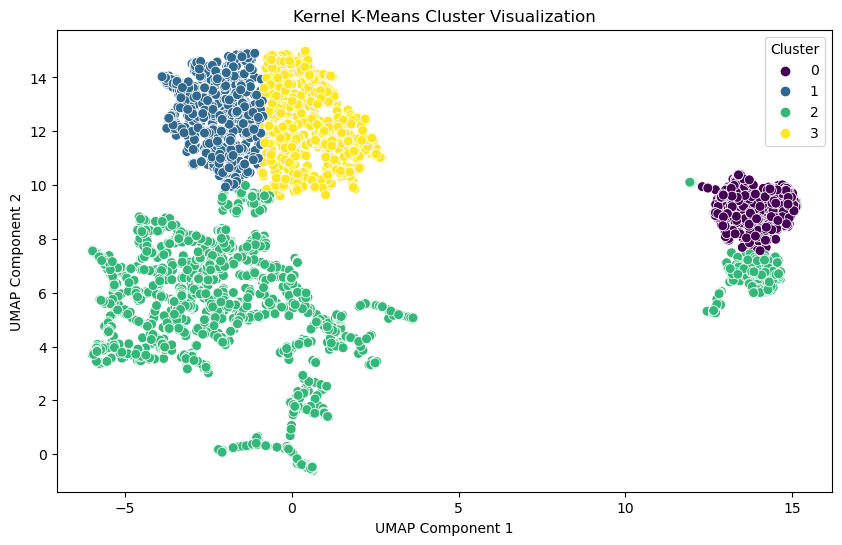

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import umap
from sklearn.metrics import pairwise_kernels
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('cleaned_train.csv')

# Filter out "Adult" category
data = data[data['age_group'] != 'Adult']

# Ordinal encode the 'age_group' column
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['Child', 'Early Teen', 'Teen', 'Young Adult']])
data['age_group'] = ordinal_encoder.fit_transform(data[['age_group']])

# Drop unnecessary columns
columns_to_drop = ['id', 'sii']  # Adjust according to your dataset
data_numeric = data.drop(columns=columns_to_drop, axis=1)

# Split into features and target
X = data_numeric
y = data['sii']

# Oversampling using ADASYN
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Dimensionality reduction with UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_train_umap = umap_model.fit_transform(X_train)
X_test_umap = umap_model.transform(X_test)

# Kernel K-Means function
def kernel_kmeans(K, n_clusters, max_iter=100, tol=1e-4):
    """
    Kernel K-Means implementation.
    Parameters:
        K: Kernel matrix (n_samples x n_samples)
        n_clusters: Number of clusters
        max_iter: Maximum number of iterations
        tol: Convergence tolerance
    Returns:
        cluster_assignments: Cluster labels for each point
        J: Objective function value at each iteration
    """
    n_samples = K.shape[0]
    np.random.seed(42)
    cluster_assignments = np.random.randint(0, n_clusters, n_samples)
    J_previous = float('inf')
    
    for iteration in range(max_iter):
        clusters = [np.where(cluster_assignments == c)[0] for c in range(n_clusters)]
        N = [len(cluster) for cluster in clusters]
        distance_matrix = np.zeros((n_samples, n_clusters))
        
        for c in range(n_clusters):
            if N[c] > 0:
                cluster_kernel_sum = K[:, clusters[c]].sum(axis=1)
                distance_matrix[:, c] = np.diag(K) - (2 / N[c]) * cluster_kernel_sum + \
                                        (1 / (N[c]**2)) * np.sum(K[np.ix_(clusters[c], clusters[c])])
        
        new_assignments = np.argmin(distance_matrix, axis=1)
        J = np.sum(distance_matrix[np.arange(n_samples), new_assignments])
        if np.abs(J - J_previous) < tol:
            break
        cluster_assignments = new_assignments
        J_previous = J
    
    return cluster_assignments, J

# Compute the kernel matrix (Gaussian kernel with sigma=1.0)
sigma = 1.0
kernel_matrix = pairwise_kernels(X_train_umap, metric='rbf', gamma=1/(2 * sigma**2))

# Apply Kernel K-Means
n_clusters = 4  # Set the number of clusters
cluster_labels, _ = kernel_kmeans(kernel_matrix, n_clusters=n_clusters)

# Evaluate the clustering
silhouette = silhouette_score(X_train_umap, cluster_labels)
calinski_harabasz = calinski_harabasz_score(X_train_umap, cluster_labels)
davies_bouldin = davies_bouldin_score(X_train_umap, cluster_labels)

print(f"Kernel K-Means Clustering Metrics:")
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_umap[:, 0], y=X_train_umap[:, 1], hue=cluster_labels, palette='viridis', s=50)
plt.title('Kernel K-Means Cluster Visualization')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Cluster')
plt.show()


### K-Means in 3D Space

C:\Users\samhi\anaconda3\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


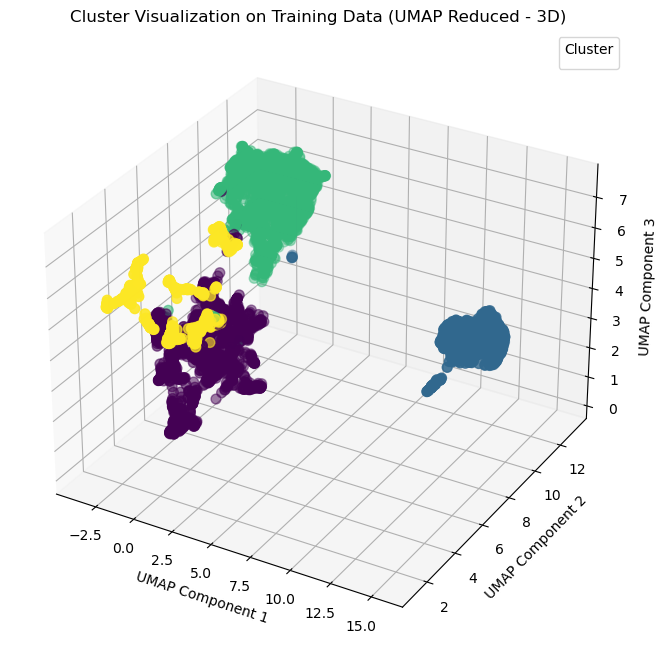

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


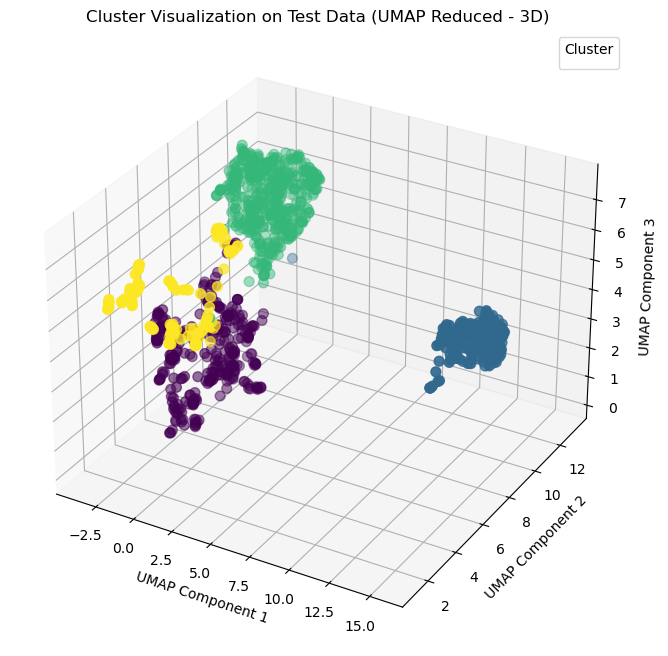

In [32]:
from sklearn.metrics import rand_score, adjusted_rand_score, mutual_info_score, v_measure_score
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import umap

# Load the dataset
data = pd.read_csv('cleaned_train.csv')

# Step 1: Filter out "Adult" category
data = data[data['age_group'] != 'Adult']

# Step 2: Ordinal encode the 'age_group' column
ordinal_encoder = OrdinalEncoder(categories=[['Child', 'Early Teen', 'Teen', 'Young Adult']])
data['age_group'] = ordinal_encoder.fit_transform(data[['age_group']])

# Drop unnecessary columns
columns_to_drop = ['id', 'sii']  # Remove unnecessary columns
data_numeric = data.drop(columns=columns_to_drop, axis=1)

# Split into features and target
X = data_numeric
y = data['sii']  # Use 'sii' for oversampling

# Step 3: Apply ADASYN for Oversampling
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Step 4: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Step 5: UMAP for Dimensionality Reduction (3D)
umap_model = umap.UMAP(n_components=3, random_state=42)  # Reduce to 3 components
X_train_umap = umap_model.fit_transform(X_train)
X_test_umap = umap_model.transform(X_test)  # Apply the same transformation to test data

# Step 9: Visualize Clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Train Data 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_umap[:, 0], X_train_umap[:, 1], X_train_umap[:, 2], c=train_clusters, cmap='viridis', s=50)
ax.set_title('Cluster Visualization on Training Data (UMAP Reduced - 3D)')
ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')
plt.legend(title='Cluster')
plt.show()

# Test Data 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test_umap[:, 0], X_test_umap[:, 1], X_test_umap[:, 2], c=test_clusters, cmap='viridis', s=50)
ax.set_title('Cluster Visualization on Test Data (UMAP Reduced - 3D)')
ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')
plt.legend(title='Cluster')
plt.show()
